# 02 - PCA Analysis

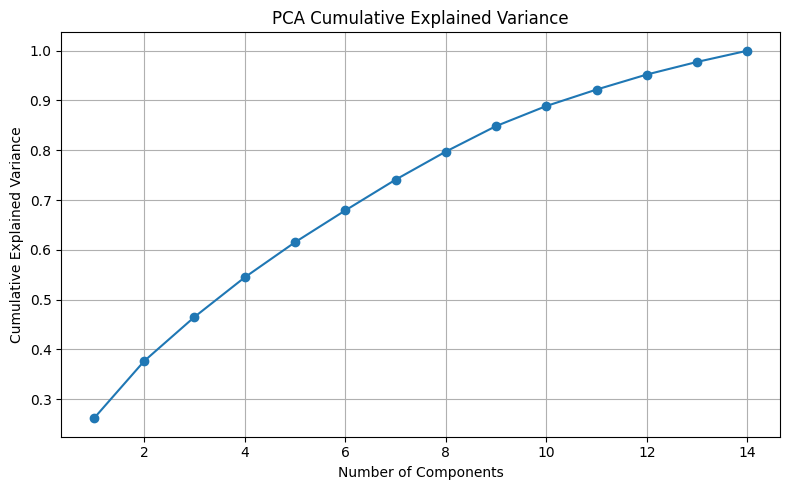

First 10 component variances: [0.26123523 0.11511504 0.08861341 0.07953011 0.07056328 0.06393026
 0.06178592 0.05647933 0.05126716 0.04032784]


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

CLEAN_PATH = Path.cwd().parents[0] / 'data' / 'heart_disease_clean.csv'
df = pd.read_csv(CLEAN_PATH)

# Separate features/target (assumes 'target' column exists)
X = df.drop(columns=['target'])
y = df['target']

# Standardize numeric features only
X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

expl_var = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(expl_var)+1), expl_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.savefig('../results/pca_cumulative_variance.png', dpi=150)
plt.show()

print('First 10 component variances:', pca.explained_variance_ratio_[:10])
